In [117]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [119]:
folder_path = r"C:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\dataset sentimen"
all_files = glob.glob(folder_path + "/*.csv") + glob.glob(folder_path + "/*.CSV")

df_merged = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df_merged.to_csv(folder_path + "/brics.csv", index=False)

In [120]:
df_merged

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,1.850576e+18,Sun Oct 27 16:32:20 +0000 2024,4420.0,Mengapa Banyak Negara ingin bergabung dengan B...,1.850576e+18,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29.0,...,1.292806e+18,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.849710e+18,Fri Oct 25 07:08:34 +0000 2024,79.0,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1.849710e+18,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2.0,...,3.236418e+08,destsoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.849794e+18,Fri Oct 25 12:43:48 +0000 2024,9522.0,Kalo pada akhirnya Indonesia join BRICS good m...,1.849794e+18,NaN,NaN,in,Indonesia,441.0,...,1.292806e+18,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.849695e+18,Fri Oct 25 06:10:58 +0000 2024,24770.0,JUST IN: 🇮🇩 Indonesia officially begins proces...,1.849695e+18,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654.0,...,1.449140e+18,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.821423e+18,Thu Aug 08 05:47:32 +0000 2024,12779.0,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1.821423e+18,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93.0,...,1.449140e+18,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70465,1.741855e+18,Mon Jan 01 16:12:33 +0000 2024,189.0,🇷🇺MFA: A pivotal moment in the development of ...,1.741855e+18,NaN,NaN,en,London,5.0,...,1.147184e+08,RussianEmbassy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70466,1.742173e+18,Tue Jan 02 13:17:27 +0000 2024,252.0,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1.742173e+18,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1.0,...,2.454786e+08,benjimk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70467,1.741915e+18,Mon Jan 01 20:24:27 +0000 2024,215.0,@ConflictTR Merak edenler için BRICS Brezilya ...,1.741918e+18,NaN,ConflictTR,tr,Türkiye,0.0,...,1.115228e+09,os1mheen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70468,1.742010e+18,Tue Jan 02 02:30:24 +0000 2024,255.0,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1.742010e+18,NaN,NaN,en,India,2.0,...,1.282129e+08,satyagodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data = pd.read_csv("dataset sentimen/brics.csv")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,1.850576e+18,Sun Oct 27 16:32:20 +0000 2024,4420.0,Mengapa Banyak Negara ingin bergabung dengan B...,1.850576e+18,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29.0,...,1.292806e+18,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.849710e+18,Fri Oct 25 07:08:34 +0000 2024,79.0,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1.849710e+18,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2.0,...,3.236418e+08,destsoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.849794e+18,Fri Oct 25 12:43:48 +0000 2024,9522.0,Kalo pada akhirnya Indonesia join BRICS good m...,1.849794e+18,NaN,NaN,in,Indonesia,441.0,...,1.292806e+18,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.849695e+18,Fri Oct 25 06:10:58 +0000 2024,24770.0,JUST IN: 🇮🇩 Indonesia officially begins proces...,1.849695e+18,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654.0,...,1.449140e+18,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.821423e+18,Thu Aug 08 05:47:32 +0000 2024,12779.0,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1.821423e+18,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93.0,...,1.449140e+18,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70465,1.741855e+18,Mon Jan 01 16:12:33 +0000 2024,189.0,🇷🇺MFA: A pivotal moment in the development of ...,1.741855e+18,NaN,NaN,en,London,5.0,...,1.147184e+08,RussianEmbassy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70466,1.742173e+18,Tue Jan 02 13:17:27 +0000 2024,252.0,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1.742173e+18,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1.0,...,2.454786e+08,benjimk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70467,1.741915e+18,Mon Jan 01 20:24:27 +0000 2024,215.0,@ConflictTR Merak edenler için BRICS Brezilya ...,1.741918e+18,NaN,ConflictTR,tr,Türkiye,0.0,...,1.115228e+09,os1mheen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70468,1.742010e+18,Tue Jan 02 02:30:24 +0000 2024,255.0,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1.742010e+18,NaN,NaN,en,India,2.0,...,1.282129e+08,satyagodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70470 entries, 0 to 70469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      50520 non-null  float64
 1   created_at               70470 non-null  object 
 2   favorite_count           50520 non-null  float64
 3   full_text                70470 non-null  object 
 4   id_str                   50520 non-null  float64
 5   image_url                24900 non-null  object 
 6   in_reply_to_screen_name  5490 non-null   object 
 7   lang                     50520 non-null  object 
 8   location                 37200 non-null  object 
 9   quote_count              50520 non-null  float64
 10  reply_count              50520 non-null  float64
 11  retweet_count            50520 non-null  float64
 12  tweet_url                50520 non-null  object 
 13  user_id_str              50520 non-null  float64
 14  username              

In [123]:
columns_drop = ['conversation_id_str', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str']

data = data.drop(columns = columns_drop)

data


,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
70465,Mon Jan 01 16:12:33 +0000 2024,🇷🇺MFA: A pivotal moment in the development of ...,RussianEmbassy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70466,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70467,Mon Jan 01 20:24:27 +0000 2024,@ConflictTR Merak edenler için BRICS Brezilya ...,os1mheen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70468,Tue Jan 02 02:30:24 +0000 2024,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,satyagodara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [124]:
data.duplicated().sum()

np.int64(67611)

In [125]:
data = data.drop_duplicates()

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2859 entries, 0 to 4792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       2859 non-null   object
 1   full_text        2859 non-null   object
 2   username         2859 non-null   object
 3   cleaned_text     1425 non-null   object
 4   translate_text   1425 non-null   object
 5   lower_text       1425 non-null   object
 6   normalize_text   1425 non-null   object
 7   stopwords_text   1425 non-null   object
 8   tokenisasi_text  1425 non-null   object
 9   stemming_text    1425 non-null   object
 10  sentimen         1425 non-null   object
dtypes: object(11)
memory usage: 268.0+ KB


In [127]:
# remove punctuation
def clean_text(text):
    # Menghapus tautan
    text = re.sub(r'http[s]?://\S+', '', text)
    # Menghapus kalimat yang sama dengan tautan yang dihapus
    text = re.sub(r'\b\w+\b(?:\s+\b\w+\b)*\s*http[s]?://\S+', '', text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus spasi ekstra
    text = ' '.join(text.split())
    return text

# Terapkan fungsi pembersihan ke kolom 'full_text'
data['cleaned_text'] = data['full_text'].apply(clean_text)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\177464211.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['full_text'].apply(clean_text)


In [128]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...,"['etiopia', '🇪', '🇹', 'mesir', '🇪', 'get', 'ir...",etiopia mesir get iran arab saudi uni emirat a...,Netral


In [ ]:
# translate teks ke Indonesia
translator = GoogleTranslator(source='auto', target='id')

data['translate_text'] = data['cleaned_text'].apply(translator.translate)

In [14]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...,"['etiopia', '🇪', '🇹', 'mesir', '🇪', 'get', 'ir...",etiopia mesir get iran arab saudi uni emirat a...,Netral


In [15]:
# case folding
data['lower_text'] = data['translate_text'].str.lower()

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\269926704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lower_text'] = data['translate_text'].str.lower()


In [16]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,NaN,NaN,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,NaN,NaN,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,NaN,NaN,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,NaN,NaN,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...,"['etiopia', '🇪', '🇹', 'mesir', '🇪', 'get', 'ir...",etiopia mesir get iran arab saudi uni emirat a...,Netral


In [17]:
# kamus normalisasi
normalization_dict = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "enggak": "tidak",
    "gak": "tidak",
    "sy": "saya",
    "saya": "saya",
    "gw": "saya",
    "gue": "saya",
    "gua": "saya",
    "ane": "saya",
    "bgt": "banget",
    "bgd": "banget",
    "banget": "banget",
    "sng": "sangat",
    "aja": "saja",
    "bro": "teman",
    "sist": "teman",
    "brother": "teman",
    "sis": "teman",
    "temen": "teman",
    "dgn": "dengan",
    "dg": "dengan",
    "kmrn": "kemarin",
    "kmren": "kemarin",
    "besok": "besok",
    "besokk": "besok",
    "mending": "lebih baik",
    "bangettt": "banget",
    "dr": "dari",
    "drpd": "daripada",
    "spt": "seperti",
    "sama": "dengan",
    "org": "orang",
    "om": "paman",
    "tante": "bibi",
    "bgtu": "begitu",
    "lha": "saya",
    "pd": "pada",
    "buat": "untuk",
    "untk": "untuk",
    "utk": "untuk",
    "kayak": "seperti",
    "yg": "yang",
    "aja": "saja",
    "byk": "banyak",
    "bnyk": "banyak",
    "jd": "jadi",
    "jdii": "jadi",
    "ngapain": "kenapa",
    "knp": "kenapa",
    "dmn": "dimana",
    "dimn": "dimana",
    "blg": "bilang",
    "tau": "tahu",
    "tauu": "tahu",
    "tauh": "tahu",
    "ngga": "tidak",
    "blm": "belum",
    "belom": "belum",
    "tdk": "tidak",
    "trs": "terus",
    "sm": "sama",
    "bs": "bisa",
    "gpp": "tidak apa-apa",
    "oke": "baik",
    "ok": "baik",
    "sip": "baik",
    "okey": "baik",
    "skrg": "sekarang",
    "skg": "sekarang",
    "sdh": "sudah",
    "udh": "sudah",
    "mau": "ingin",
    "ckp": "cukup",
    "dkt": "dekat",
    "deket": "dekat",
    "pas": "ketika",
    "thn": "tahun",
    "th": "tahun",
    "pls": "tolong",
    "tolong": "tolong",
    "pliss": "tolong",
    "thx": "terima kasih",
    "thanks": "terima kasih",
    "makasih": "terima kasih",
    "makasihh": "terima kasih",
    "terimakasih": "terima kasih",
    "tnpa": "tanpa",
    "btw": "omong-omong",
    "nggk": "tidak",
    "nggk": "tidak",
    "lg": "lagi",
    "lagi": "lagi",
    "blg": "bilang",
    "cm": "cuma",
    "cuman": "hanya",
    "cmn": "cuma",
    "liat": "lihat",
    "kmn": "kemana",
    "kalo" : "kalau",
    "cmn": "cuma",
    "nanya": "bertanya",
    "nyuruh": "menyuruh",
    "bsok": "besok",
    "td": "tadi",
    "trus": "terus",
    "bljr": "belajar",
    "sbk": "sibuk",
    "dg": "dengan",
    "nyoba": "mencoba",
    "dlu": "dulu",
    "mslh": "masalah",
    "mslh": "masalah",
    "semngat": "semangat",
    "pake": "menggunakan",
    "gitu": "seperti itu",
    "gituan": "seperti itu",
    "gimana": "bagaimana",
    "yg": "yang",
    "aja": "saja",
    "kl": "kalau",
    "klu": "kalau",
    "tlg": "tolong",
    "btw": "omong-omong"
}

# normalisasi teks
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

data['normalize_text'] = data['lower_text'].apply(lambda x: normalize_text(x, normalization_dict))

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\3659413613.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalize_text'] = data['lower_text'].apply(lambda x: normalize_text(x, normalization_dict))


In [ ]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,NaN,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,NaN,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,NaN,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,NaN,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...,"['etiopia', '🇪', '🇹', 'mesir', '🇪', 'get', 'ir...",etiopia mesir get iran arab saudi uni emirat a...,Netral


In [ ]:
# Inisialisasi factory stopword remover
factory = StopWordRemoverFactory()
stopwords_remover = factory.create_stop_word_remover()

def stopword_remove_sastrawi(text):
    # Menghapus stopword menggunakan Sastrawi
    cleaned_text = stopwords_remover.remove(text)
    
    # Menghapus kata 'blackpink' dan 'bri'
    cleaned_text = cleaned_text.replace('blackpink', '').replace('bri', '')
    
    return cleaned_text

# Terapkan pada kolom 'normalize_text'
data['stopwords_text'] = data['normalize_text'].apply(stopword_remove_sastrawi)

In [20]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('Indonesian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['stopwords_text'] = data['stopwords_text'].apply(remove_stopwords)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\3322963135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stopwords_text'] = data['stopwords_text'].apply(remove_stopwords)


In [21]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,NaN,NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,NaN,NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,NaN,NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,NaN,NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,"['etiopia', '🇪', '🇹', 'mesir', '🇪', 'get', 'ir...",etiopia mesir get iran arab saudi uni emirat a...,Netral


In [22]:
# Tokenisasi teks
nlp = spacy.load("xx_ent_wiki_sm")

data['tokenisasi_text'] = data['stopwords_text'].apply(lambda x: [token.text for token in nlp(x)])


C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\2640521806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenisasi_text'] = data['stopwords_text'].apply(lambda x: [token.text for token in nlp(x)])


In [23]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"[negara, bergabung, brics, indonesia, a, thread]",NaN,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"[1, brics, rp, 366000, tgl, 25, oktober, kemar...",NaN,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"[indonesia, join, brics, good, move, or, bad, ...",NaN,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"[🇮, 🇩, indonesia, resmi, proses, anggota, brics]",NaN,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"[rusia, indonesia, menggelar, latihan, angkata...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"[mesir, iran, arab, saudi, uea, ethiopia, resm...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"[ethiopia, iran, mesir, bergabung, brics, bara...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","[resmi, ,, brics, berkembang, selamat, kerajaa...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,"[etiopia, 🇪, 🇹, mesir, 🇪, get, iran, 🇮, 🇷, ara...",etiopia mesir get iran arab saudi uni emirat a...,Ne

In [24]:
# Stemming Teks
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stem_tokens(tokens):
    # Gabungkan list token menjadi string
    text = ' '.join(tokens)
    # Lakukan stemming
    return stemmer.stem(text)

# Terapkan fungsi pada kolom tokenisasi_text
data['stemming_text'] = data['tokenisasi_text'].apply(stem_tokens)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\4182247402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemming_text'] = data['tokenisasi_text'].apply(stem_tokens)


In [25]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"[negara, bergabung, brics, indonesia, a, thread]",negara gabung brics indonesia a thread,NaN
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"[1, brics, rp, 366000, tgl, 25, oktober, kemar...",1 brics rp 366000 tgl 25 oktober kemarin dilun...,NaN
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"[indonesia, join, brics, good, move, or, bad, ...",indonesia join brics good move or bad move,NaN
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"[🇮, 🇩, indonesia, resmi, proses, anggota, brics]",indonesia resmi proses anggota brics,NaN
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"[rusia, indonesia, menggelar, latihan, angkata...",rusia indonesia gelar latih angkat laut gabung...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4788,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"[mesir, iran, arab, saudi, uea, ethiopia, resm...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
4789,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"[ethiopia, iran, mesir, bergabung, brics, bara...",ethiopia iran mesir gabung brics barat jatuh,Positif
4790,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","[resmi, ,, brics, berkembang, selamat, kerajaa...",resmi brics kembang selamat raja arab saudi un...,Netral
4791,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi Arabi...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi arabi...,etiop

# Modelling

In [26]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
data = pd.read_csv("dataset sentimen/brics_processing.csv")
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"['negara', 'bergabung', 'brics', 'indonesia', ...",negara gabung brics indonesia a thread,Netral
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"['1', 'brics', 'rp', '366000', 'tgl', '25', 'o...",1 brics rp 366000 tgl 25 oktober kemarin dilun...,Positif
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"['indonesia', 'join', 'brics', 'good', 'move',...",indonesia join brics good move or bad move,Positif
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"['🇮', '🇩', 'indonesia', 'resmi', 'proses', 'an...",indonesia resmi proses anggota brics,Positif
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...,Negatif
...,...,...,...,...,...,...,...,...,...,...,...
1420,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
1421,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
1422,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
1423,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab

In [ ]:
data['stemming_text']

0                  negara gabung brics indonesia a thread
1       1 brics rp 366000 tgl 25 oktober kemarin dilun...
2              indonesia join brics good move or bad move
3                    indonesia resmi proses anggota brics
4       rusia indonesia gelar latih angkat laut gabung...
                              ...                        
1420    mesir iran arab saudi uea ethiopia resmi gabun...
1421         ethiopia iran mesir gabung brics barat jatuh
1422    resmi brics kembang selamat raja arab saudi un...
1423    etiopia mesir get iran arab saudi uni emirat a...
1424    breaking uni emirat arab arab saudi ethiopia m...
Name: stemming_text, Length: 1425, dtype: object

In [29]:
# membangun model
model = GPT2ForSequenceClassification.from_pretrained("cahya/gpt2-medium-indonesian", num_labels=3)
tokenizer = GPT2Tokenizer.from_pretrained("cahya/gpt2-medium-indonesian")
tokenizer.pad_token = tokenizer.eos_token

def predict_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Tidak Valid"  # Untuk mengatasi nilai yang kosong atau tidak valid

    # Tokenisasi teks menjadi tensor input untuk model
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    
    if prediction == 0:
        return "Positif"
    elif prediction == 1:
        return "Netral"
    elif prediction == 2:
        return "Negatif"

data['sentimen'] = data['stemming_text'].apply(predict_sentiment)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at cahya/gpt2-medium-indonesian and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
data = data.dropna()

In [31]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"['negara', 'bergabung', 'brics', 'indonesia', ...",negara gabung brics indonesia a thread,Negatif
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"['1', 'brics', 'rp', '366000', 'tgl', '25', 'o...",1 brics rp 366000 tgl 25 oktober kemarin dilun...,Netral
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"['indonesia', 'join', 'brics', 'good', 'move',...",indonesia join brics good move or bad move,Netral
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"['🇮', '🇩', 'indonesia', 'resmi', 'proses', 'an...",indonesia resmi proses anggota brics,Negatif
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...,Negatif
...,...,...,...,...,...,...,...,...,...,...,...
1420,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Negatif
1421,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Negatif
1422,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
1423,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab 

# Analisis Data

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [33]:
data = pd.read_csv("dataset sentimen/brics_processing.csv")
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"['negara', 'bergabung', 'brics', 'indonesia', ...",negara gabung brics indonesia a thread,Netral
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"['1', 'brics', 'rp', '366000', 'tgl', '25', 'o...",1 brics rp 366000 tgl 25 oktober kemarin dilun...,Positif
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"['indonesia', 'join', 'brics', 'good', 'move',...",indonesia join brics good move or bad move,Positif
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"['🇮', '🇩', 'indonesia', 'resmi', 'proses', 'an...",indonesia resmi proses anggota brics,Positif
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...,Negatif
...,...,...,...,...,...,...,...,...,...,...,...
1420,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
1421,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
1422,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
1423,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\2919571856.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


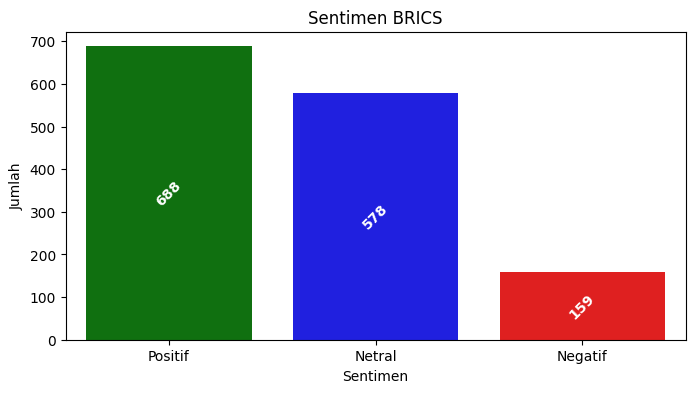

In [34]:
jumlah_sentimen = data['sentimen'].value_counts()

colors = {
    'Positif' : 'green',
    'Negatif' : 'red',
    'Netral'  : 'blue'
}

plt.figure(figsize=(8, 4))
bars = sns.barplot(
    x=jumlah_sentimen.index,
    y=jumlah_sentimen.values,
    palette=[colors[label] for label in jumlah_sentimen.index]
)

for bar, count in zip(bars.patches, jumlah_sentimen.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{count}',
        ha='center', va='center', color='white', fontweight='bold', rotation=45
    )

plt.title("Sentimen BRICS")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

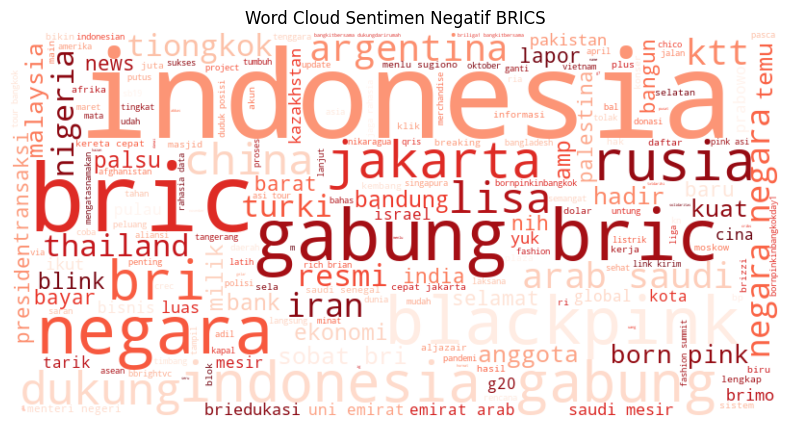

In [35]:
from wordcloud import WordCloud

sentimen_negatif = data[data['sentimen'] == 'Negatif']['stemming_text']

sentimen_negatif = ' '.join(sentimen_negatif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(sentimen_negatif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Negatif BRICS")

plt.show()


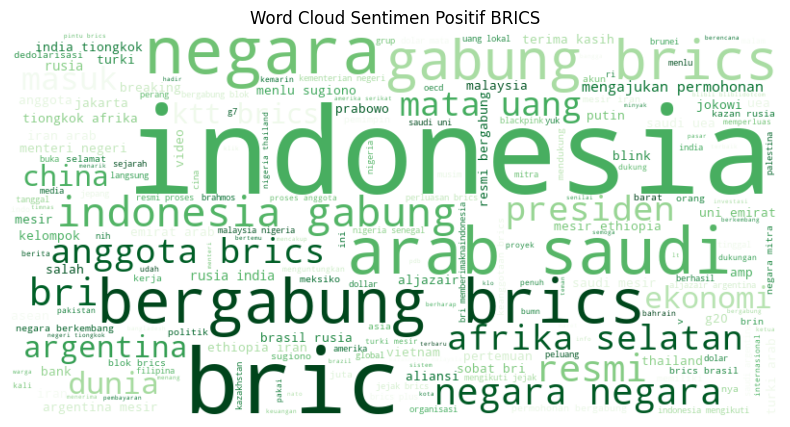

In [36]:
sentimen_positif = data[data['sentimen'] == 'Positif']['stopwords_text']

sentimen_positif = ' '.join(sentimen_positif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(sentimen_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

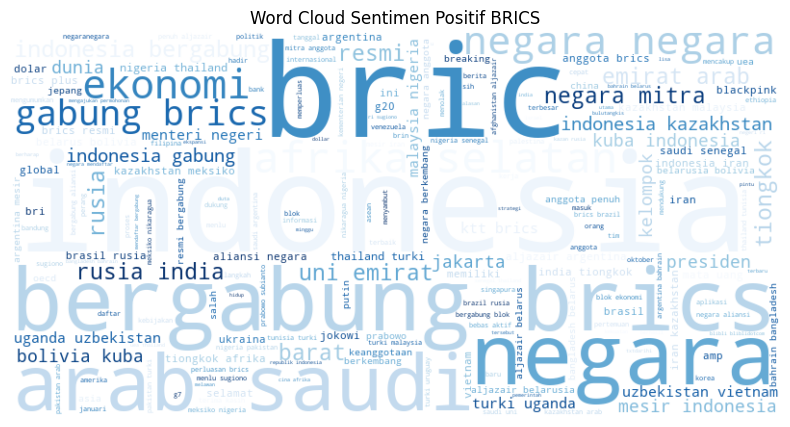

In [37]:
sentimen_netral = data[data['sentimen'] == 'Netral']['stopwords_text']

sentimen_netral = ' '.join(sentimen_netral)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(sentimen_netral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

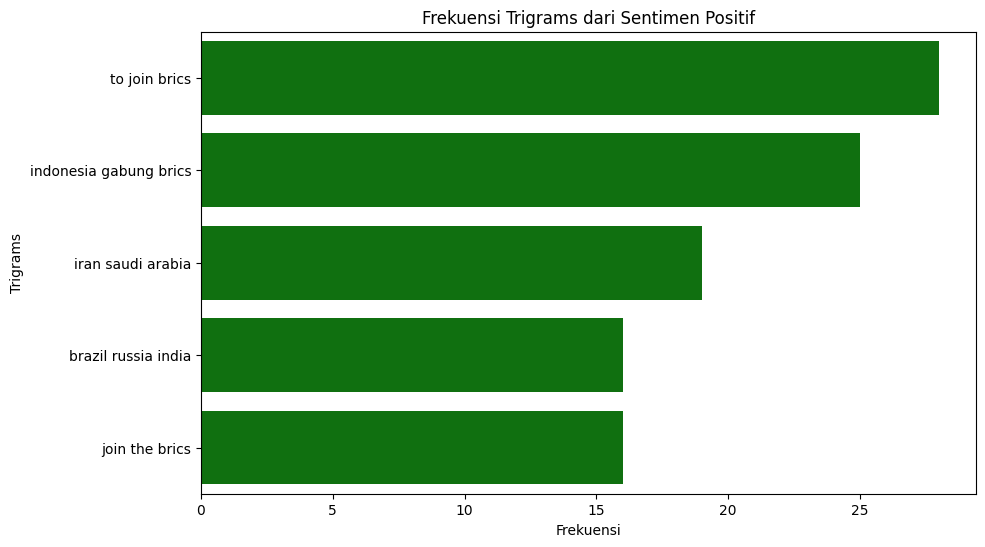

In [38]:
def get_top_trigrams_positif(data, n=5):
    positif_data = data[data['sentimen'] == 'Positif']
    
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigrams_matrix = vectorizer.fit_transform(positif_data['cleaned_text'])
    
    trigrams = vectorizer.get_feature_names_out()
    freqs = trigrams_matrix.sum(axis=0).A1
    trigrams_freq = dict(zip(trigrams, freqs))
    
    top_trigrams = Counter(trigrams_freq).most_common(n)
    return top_trigrams

top_trigrams_positif = get_top_trigrams_positif(data)
trigrams, frequencies = zip(*top_trigrams_positif)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequencies), y=list(trigrams), color="green")
plt.xlabel("Frekuensi")
plt.ylabel("Trigrams")
plt.title("Frekuensi Trigrams dari Sentimen Positif")
plt.show()



c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


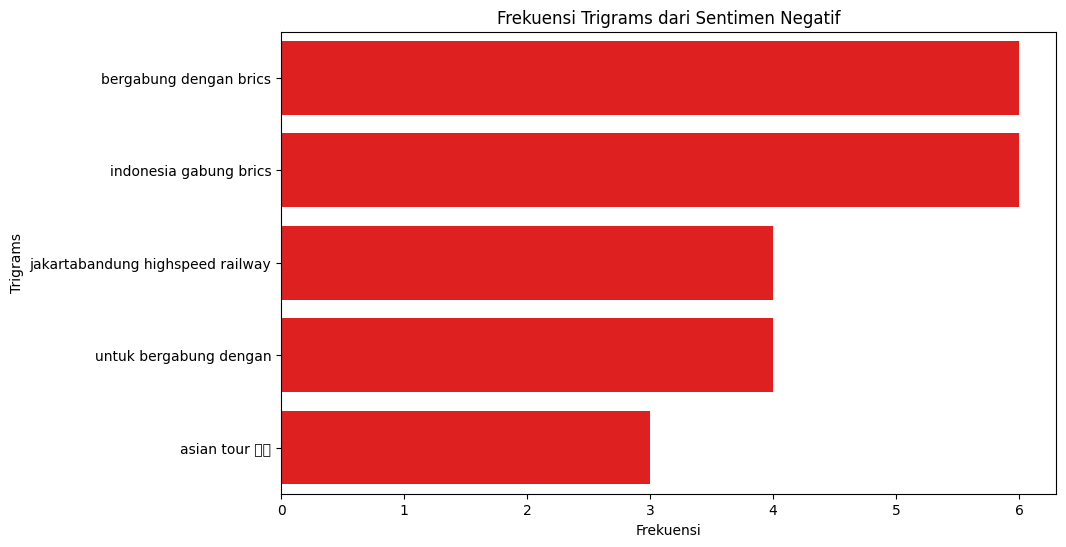

In [39]:
def get_top_trigrams_negatif(data, n=5):
    negatif_data = data[data['sentimen'] == 'Negatif']
    
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigrams_matrix = vectorizer.fit_transform(negatif_data['cleaned_text'])
    
    trigrams = vectorizer.get_feature_names_out()
    freqs = trigrams_matrix.sum(axis=0).A1
    trigrams_freq = dict(zip(trigrams, freqs))
    
    top_trigrams = Counter(trigrams_freq).most_common(n)
    return top_trigrams

top_trigrams_negatif = get_top_trigrams_negatif(data)
trigrams, frequencies = zip(*top_trigrams_negatif)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequencies), y=list(trigrams), color="red")
plt.xlabel("Frekuensi")
plt.ylabel("Trigrams")
plt.title("Frekuensi Trigrams dari Sentimen Negatif")
plt.show()

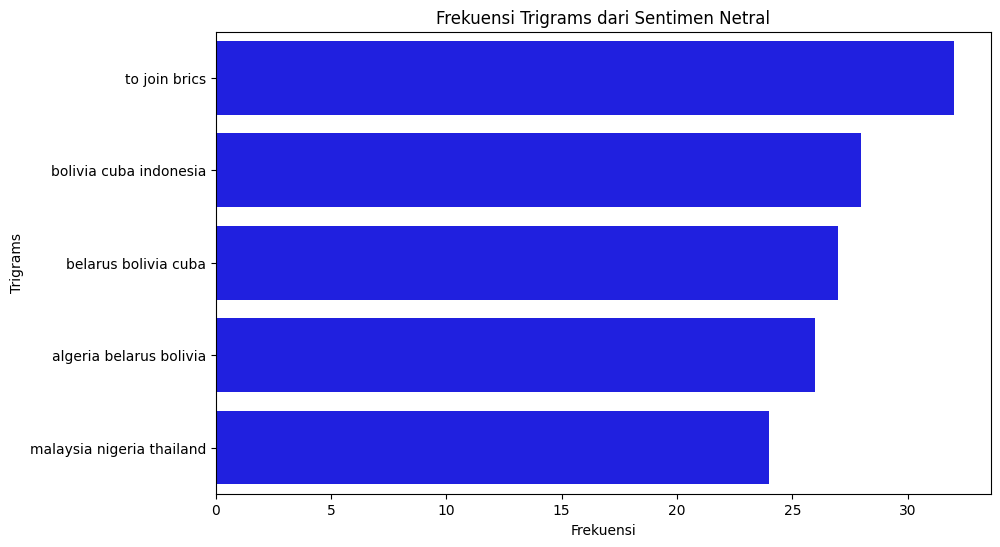

In [40]:
def get_top_trigrams_netral(data, n=5):
    netral_data = data[data['sentimen'] == 'Netral']
    
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigrams_matrix = vectorizer.fit_transform(netral_data['cleaned_text'])
    
    trigrams = vectorizer.get_feature_names_out()
    freqs = trigrams_matrix.sum(axis=0).A1
    trigrams_freq = dict(zip(trigrams, freqs))
    
    top_trigrams = Counter(trigrams_freq).most_common(n)
    return top_trigrams

top_trigrams_netral = get_top_trigrams_netral(data)
trigrams, frequencies = zip(*top_trigrams_netral)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequencies), y=list(trigrams), color="blue")
plt.xlabel("Frekuensi")
plt.ylabel("Trigrams")
plt.title("Frekuensi Trigrams dari Sentimen Netral")
plt.show()


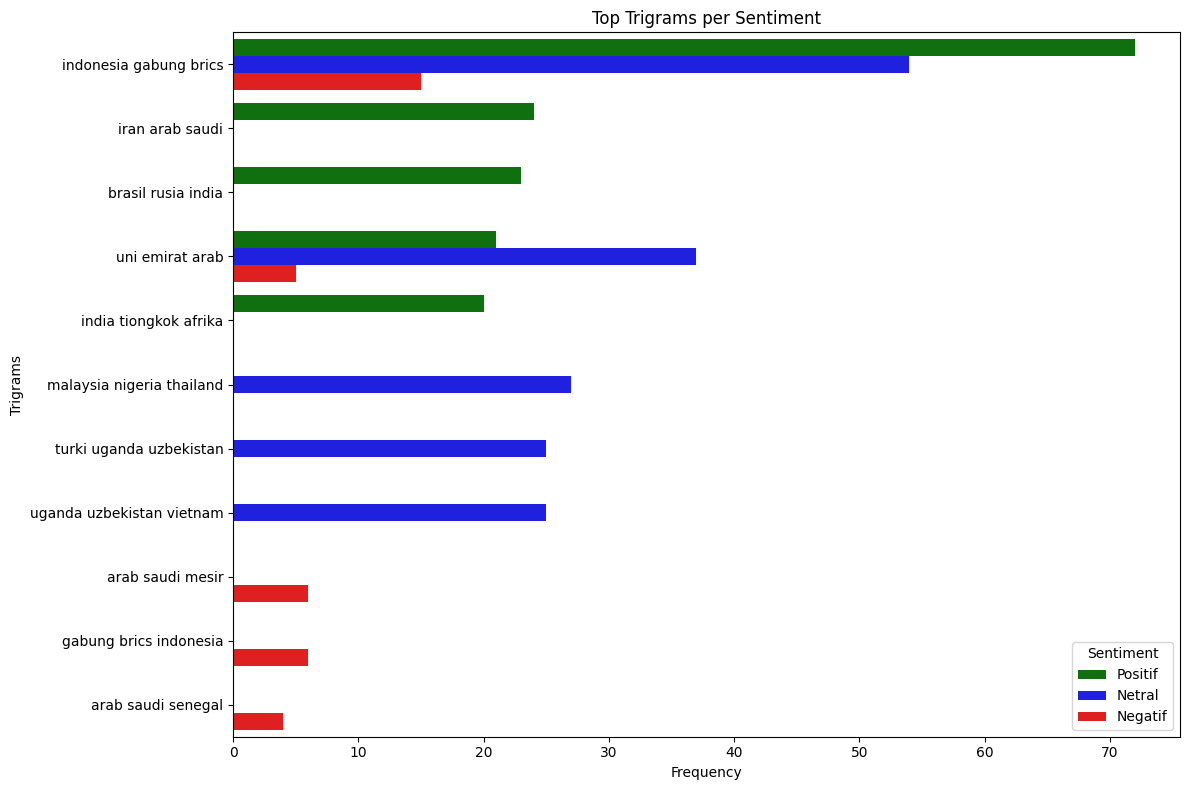

In [41]:
def get_top_trigrams(data, sentimen, n=5):
    # Filter data berdasarkan sentimen
    sentimen_data = data[data['sentimen'] == sentimen]
    
    # Inisialisasi CountVectorizer untuk trigram
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigrams_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    # Mendapatkan trigram dan frekuensinya
    trigrams = vectorizer.get_feature_names_out()
    freqs = trigrams_matrix.sum(axis=0).A1
    trigram_freq = dict(zip(trigrams, freqs))
    
    # Mengurutkan trigram berdasarkan frekuensi dan mengambil top-n trigram
    top_trigrams = Counter(trigram_freq).most_common(n)
    return top_trigrams

# Mendapatkan top trigram untuk setiap sentimen
top_trigrams_positif = get_top_trigrams(data, 'Positif')
top_trigrams_netral = get_top_trigrams(data, 'Netral')
top_trigrams_negatif = get_top_trigrams(data, 'Negatif')

# Menyiapkan data untuk visualisasi
trigram_data = {
    'Trigram': [],
    'Frequency': [],
    'Sentiment': []
}

# Menambahkan trigram positif
for trigram, freq in top_trigrams_positif:
    trigram_data['Trigram'].append(trigram)
    trigram_data['Frequency'].append(freq)
    trigram_data['Sentiment'].append('Positif')

# Menambahkan trigram netral
for trigram, freq in top_trigrams_netral:
    trigram_data['Trigram'].append(trigram)
    trigram_data['Frequency'].append(freq)
    trigram_data['Sentiment'].append('Netral')

# Menambahkan trigram negatif
for trigram, freq in top_trigrams_negatif:
    trigram_data['Trigram'].append(trigram)
    trigram_data['Frequency'].append(freq)
    trigram_data['Sentiment'].append('Negatif')

# Mengonversi ke DataFrame
trigram_df = pd.DataFrame(trigram_data)

# Plot dengan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    data=trigram_df,
    x='Frequency',
    y='Trigram',
    hue='Sentiment',
    palette={'Positif': 'green', 'Netral': 'blue', 'Negatif': 'red'}
)
plt.title('Top Trigrams per Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [42]:
def get_word_frequency(data, sentimen, top_n=10):
    # Filter data berdasarkan sentimen
    sentimen_data = data[data['sentimen'] == sentimen]
    
    # Inisialisasi CountVectorizer untuk menghitung frekuensi kata
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    # Mendapatkan kata dan frekuensi
    words = vectorizer.get_feature_names_out()
    freqs = word_matrix.sum(axis=0).A1
    words_freq = dict(zip(words, freqs))
    
    # Mengurutkan kata berdasarkan frekuensi dan mengambil top-n kata
    sorted_word_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return dict(sorted_word_freq)

# Mendapatkan top kata untuk setiap sentimen
top_words_positif = get_word_frequency(data, 'Positif')
top_words_netral = get_word_frequency(data, 'Netral')
top_words_negatif = get_word_frequency(data, 'Negatif')

# Membuat DataFrame untuk setiap sentimen dan menggabungkannya
df_positif = pd.DataFrame(list(top_words_positif.items()), columns=['Kata', 'Frekuensi_Positif']).set_index('Kata')
df_netral = pd.DataFrame(list(top_words_netral.items()), columns=['Kata', 'Frekuensi_Netral']).set_index('Kata')
df_negatif = pd.DataFrame(list(top_words_negatif.items()), columns=['Kata', 'Frekuensi_Negatif']).set_index('Kata')

# Menggabungkan DataFrame berdasarkan indeks (kata)
df_combined = df_positif.join(df_netral, how='outer').join(df_negatif, how='outer').fillna(0)

df_combined

,Frekuensi_Positif,Frekuensi_Netral,Frekuensi_Negatif
Kata,,,
anggota,94.0,92.0,0.0
arab,130.0,128.0,17.0
blackpink,0.0,0.0,26.0
bri,0.0,0.0,26.0
brics,594.0,543.0,90.0
dukung,0.0,0.0,14.0
gabung,270.0,239.0,47.0
indonesia,573.0,538.0,131.0
iran,83.0,0.0,0.0


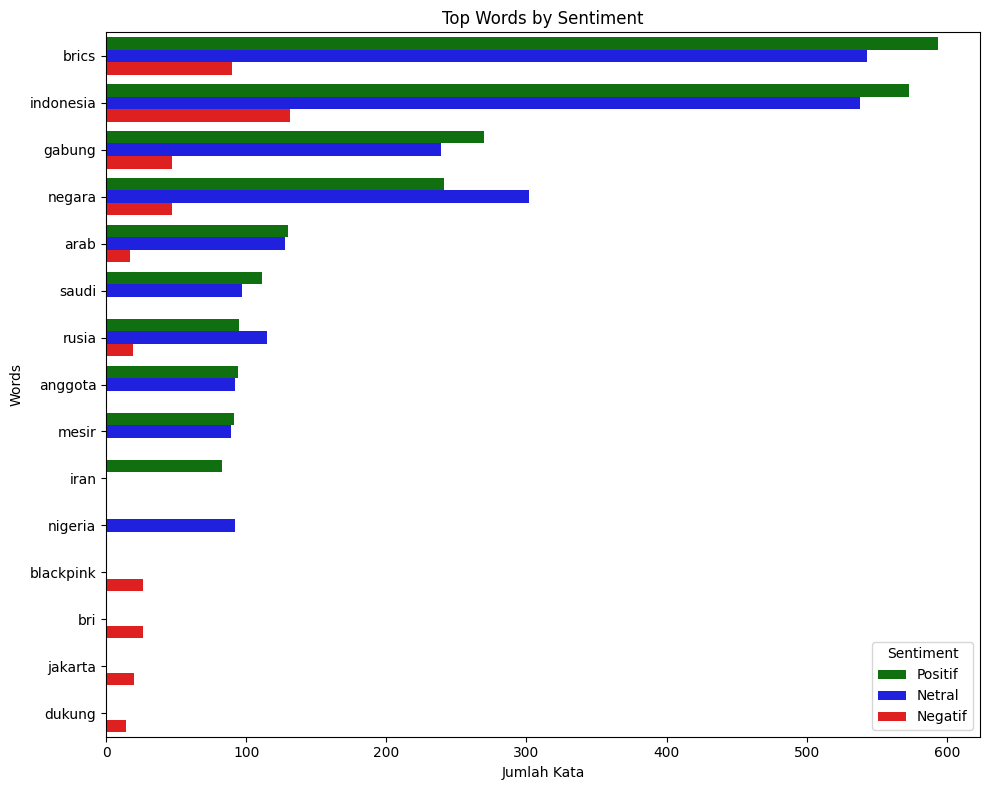

In [ ]:
def get_word_frequency(data, sentimen, top_n=10):
    sentimen_data = data[data['sentimen'] == sentimen]
    
    
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    words = vectorizer.get_feature_names_out()
    freqs = word_matrix.sum(axis=0).A1
    words_freq = dict(zip(words, freqs))
    
    sorted_word_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_word_freq

top_words_positif = get_word_frequency(data, 'Positif')
top_words_netral = get_word_frequency(data, 'Netral')
top_words_negatif = get_word_frequency(data, 'Negatif')

all_words = []
all_frequencies = []
sentiments = []

words, frequencies = zip(*top_words_positif)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Positif'] * len(words))

words, frequencies = zip(*top_words_netral)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Netral'] * len(words))

words, frequencies = zip(*top_words_negatif)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Negatif'] * len(words))

plot_data = pd.DataFrame({'Words': all_words, 'Frequency': all_frequencies, 'Sentiment': sentiments})

# Plot frekuensi kata dalam satu subplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Words', hue='Sentiment', data=plot_data, palette={'Positif': 'green', 'Netral': 'blue', 'Negatif': 'red'})
plt.title("Top Words by Sentiment")
plt.xlabel("Jumlah Kata")
plt.ylabel("Words")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_12644\2592347620.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  plot_data['x'][j] += np.random.uniform(0, 0.05)  # Geser posisi titik
C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_126

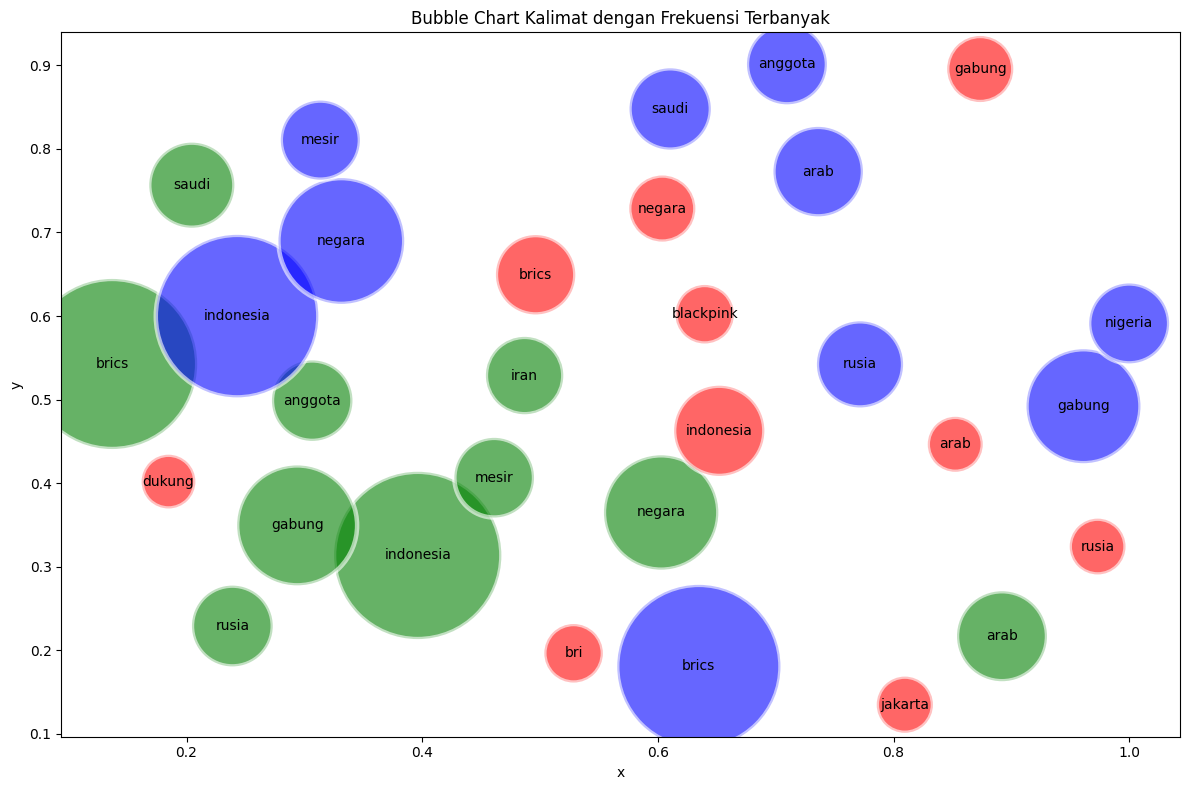

In [114]:
# Fungsi untuk menghitung frekuensi kata
def get_word_frequency(data, sentimen, top_n=10):
    sentimen_data = data[data['sentimen'] == sentimen]
    
    # Menghitung frekuensi kata
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    words = vectorizer.get_feature_names_out()
    freqs = word_matrix.sum(axis=0).A1
    words_freq = dict(zip(words, freqs))
    
    # Mengambil kata teratas berdasarkan frekuensi kata
    sorted_word_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_word_freq

# Mengambil kata-kata top berdasarkan sentimen
positif_words = get_word_frequency(data, 'Positif')
negatif_words = get_word_frequency(data, 'Negatif')
netral_words = get_word_frequency(data, 'Netral')

# Menyusun data untuk visualisasi
all_words = []
all_frequencies = []
sentiments = []

words, frequencies = zip(*positif_words)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Positif'] * len(words))

words, frequencies = zip(*negatif_words)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Negatif'] * len(words))

words, frequencies = zip(*netral_words)
all_words.extend(words)
all_frequencies.extend(frequencies)
sentiments.extend(['Netral'] * len(words))

plot_data = pd.DataFrame({'Words' : all_words, 'Frequency' : all_frequencies, 'Sentiment' : sentiments})

# Menentukan posisi acak dan mencegah tumpang tindih
np.random.seed(84)
plot_data['x'] = np.random.rand(len(plot_data)) * 0.8 + 0.1  # Memperbesar rentang
plot_data['y'] = np.random.rand(len(plot_data)) * 0.8 + 0.1

# Fungsi untuk menghindari tumpang tindih dengan pergeseran posisi dan memastikan bubble tidak keluar frame
def avoid_overlap_and_stay_in_frame(plot_data, min_dist=0.1, max_iter=500, frame_limit=(0, 1)):
    for _ in range(max_iter):
        overlap_found = False
        for i in range(len(plot_data)):
            for j in range(i + 1, len(plot_data)):
                dist = np.sqrt((plot_data['x'][i] - plot_data['x'][j])**2 + (plot_data['y'][i] - plot_data['y'][j])**2)
                if dist < min_dist:  # Jika jaraknya kurang dari min_dist
                    overlap_found = True
                    plot_data['x'][j] += np.random.uniform(0, 0.05)  # Geser posisi titik
                    plot_data['y'][j] += np.random.uniform(0, 0.05)  # Geser posisi titik
                    
                    # Memastikan posisi tetap berada dalam batas frame
                    plot_data['x'][j] = np.clip(plot_data['x'][j], frame_limit[0], frame_limit[1])
                    plot_data['y'][j] = np.clip(plot_data['y'][j], frame_limit[0], frame_limit[1])

        if not overlap_found:  # Berhenti jika tidak ada tumpang tindih
            break
    return plot_data

# menghindari tumpang tindih dan memastikan bubble tidak keluar dari frame
plot_data = avoid_overlap_and_stay_in_frame(plot_data)

# Membuat Bubble Chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='x',
    y='y',
    size='Frequency',
    hue='Sentiment',
    data=plot_data,
    sizes=(1500, 15000),
    alpha=0.6,
    palette={'Positif' : 'green', 'Negatif' : 'red', 'Netral' : 'blue'},
    legend=False
)

# Menambahkan teks
for i in range(plot_data.shape[0]):
    plt.text(
        plot_data['x'][i], 
        plot_data['y'][i], 
        plot_data['Words'][i], 
        horizontalalignment='center', 
        verticalalignment='center', 
        size=10, 
        color='black'
    )

# Mengatur tampilan
plt.title("Bubble Chart Kalimat dengan Frekuensi Terbanyak")
plt.axis()
plt.tight_layout()
plt.show()

In [ ]:
def get_word_frequency(data, sentimen, top_n=10):
    sentimen_data = data[data['sentimen'] == sentimen]
    
    
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    words = vectorizer.get_feature_names_out()
    freqs = word_matrix.sum(axis=0).A1
    words_freq = dict(zip(words, freqs))
    
    sorted_word_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_word_freq

top_words_positif = get_word_frequency(data, 'Positif')
top_words_netral = get_word_frequency(data, 'Netral')
top_words_negatif = get_word_frequency(data, 'Negatif')

table_data = {
    "Sentimen" : [],
    "Kata" : [],
    "Frekuensi" : []
}

for word, freq in top_words_positif:
    table_data["Sentimen"].append("Positif")
    table_data["Kata"].append(word)
    table_data["Frekuensi"].append(freq)
    
for word, freq in top_words_netral:
    table_data["Sentimen"].append("Netral")
    table_data["Kata"].append(word)
    table_data["Frekuensi"].append(freq)

for word, freq in top_words_negatif:
    table_data["Sentimen"].append("Negatif")
    table_data["Kata"].append(word)
    table_data["Frekuensi"].append(freq)
    
table = pd.DataFrame(table_data)
table.head(10)

,Sentimen,Kata,Frekuensi
0,Positif,brics,594
1,Positif,indonesia,573
2,Positif,gabung,270
3,Positif,negara,241
4,Positif,arab,130
5,Positif,saudi,111
6,Positif,rusia,95
7,Positif,anggota,94
8,Positif,mesir,91
9,Positif,iran,83


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fungsi untuk mendapatkan nilai TF-IDF berdasarkan sentimen
def get_tfidf(data, sentimen, top_n=10):
    # Filter data berdasarkan sentimen
    sentimen_data = data[data['sentimen'] == sentimen]
    
    # Inisialisasi TfidfVectorizer untuk unigram
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentimen_data['stemming_text'])
    
    # Mendapatkan kata dan nilai TF-IDF
    words = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_dict = dict(zip(words, tfidf_scores))
    
    # Mengurutkan kata berdasarkan nilai TF-IDF dan mengambil top-n kata
    sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return dict(sorted_tfidf)

# Mendapatkan nilai TF-IDF untuk setiap sentimen
top_tfidf_positif = get_tfidf(data, 'Positif')
top_tfidf_netral = get_tfidf(data, 'Netral')
top_tfidf_negatif = get_tfidf(data, 'Negatif')

# Membuat DataFrame untuk setiap sentimen dan menggabungkannya
df_tfidf_positif = pd.DataFrame(list(top_tfidf_positif.items()), columns=['Kata', 'TF-IDF_Positif']).set_index('Kata')
df_tfidf_netral = pd.DataFrame(list(top_tfidf_netral.items()), columns=['Kata', 'TF-IDF_Netral']).set_index('Kata')
df_tfidf_negatif = pd.DataFrame(list(top_tfidf_negatif.items()), columns=['Kata', 'TF-IDF_Negatif']).set_index('Kata')

# Menggabungkan DataFrame berdasarkan indeks (kata)
df_tfidf_combined = df_tfidf_positif.join(df_tfidf_netral, how='outer').join(df_tfidf_negatif, how='outer').fillna(0)

# Membatasi angka di belakang koma menjadi 1 digit
df_tfidf_combined = df_tfidf_combined.round(1)
df_tfidf_combined.head(10)

,TF-IDF_Positif,TF-IDF_Netral,TF-IDF_Negatif
Kata,,,
anggota,17.1,14.0,0.0
arab,22.8,19.2,3.0
blackpink,0.0,0.0,4.5
bri,0.0,0.0,3.5
brics,55.0,40.4,10.3
china,0.0,0.0,2.6
gabung,39.4,27.3,7.8
indonesia,47.5,34.2,10.7
jakarta,0.0,0.0,3.4


In [46]:
data.to_excel("dataset sentimen/brics_processing.xlsx", index=False)